In [46]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import sympy as sy
sy.init_printing() 

In [47]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [48]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display multiple results

In [49]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sy.Number)})

# <font face="gotham" color="purple"> Matrix Operations

Matrix operations are straightforward, the addition properties are as following:
1. $\pmb{A}+\pmb B=\pmb B+\pmb A$
2. $(\pmb{A}+\pmb{B})+\pmb C=\pmb{A}+(\pmb{B}+\pmb{C})$
3. $c(\pmb{A}+\pmb{B})=c\pmb{A}+c\pmb{B}$
4. $(c+d)\pmb{A}=c\pmb{A}+c\pmb{D}$
5. $c(d\pmb{A})=(cd)\pmb{A}$
6. $\pmb{A}+\pmb{0}=\pmb{A}$, where $\pmb{0}$ is the zero matrix
7. For any $\pmb{A}$, there exists an $-\pmb A$, such that $\pmb A+(-\pmb A)=\pmb0$.

They are as obvious as it shows, so no proofs are provided here.And the matrix multiplication properties are:
1. $\pmb A(\pmb{BC})=(\pmb{AB})\pmb C$
2. $c(\pmb{AB})=(c\pmb{A})\pmb{B}=\pmb{A}(c\pmb{B})$
3. $\pmb{A}(\pmb{B}+\pmb C)=\pmb{AB}+\pmb{AC}$
4. $(\pmb{B}+\pmb{C})\pmb{A}=\pmb{BA}+\pmb{CA}$

Note that we need to differentiate two kinds of multiplication, <font face="gotham" color="red">Hadamard multiplication</font> (element-wise multiplication) and <font face="gotham" color="red">matrix multiplication</font>: 

In [50]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

In [51]:
A*B # this is Hadamard elementwise product

array([[ 5, 12],
       [21, 32]])

In [52]:
A@B # this is matrix product

array([[19, 22],
       [43, 50]])

The matrix multipliation rule is

In [53]:
np.sum(A[0,:]*B[:,0]) # (1, 1)
np.sum(A[1,:]*B[:,0]) # (2, 1)
np.sum(A[0,:]*B[:,1]) # (1, 2)
np.sum(A[1,:]*B[:,1]) # (2, 2)

19

43

22

50

## <font face="gotham" color="purple"> SymPy Demonstration: Addition

Let's define all the letters as symbols in case we might use them.

In [54]:
a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z = sy.symbols('a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z', real = True)

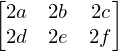

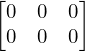

In [55]:
A = sy.Matrix([[a, b, c], [d, e, f]])
A + A
A - A

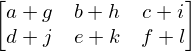

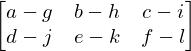

In [56]:
B = sy.Matrix([[g, h, i], [j, k, l]])
A + B
A - B

## <font face="gotham" color="purple"> SymPy Demonstration: Multiplication

The matrix multiplication rules can be clearly understood by using symbols.

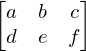

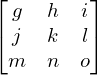

In [57]:
A = sy.Matrix([[a, b, c], [d, e, f]])
B = sy.Matrix([[g, h, i], [j, k, l], [m, n, o]])
A
B

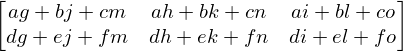

In [58]:
AB = A*B; AB

## <font face="gotham" color="purple"> Commutability

The matrix multiplication usually do not commute, such that $\pmb{AB} \neq \pmb{BA}$. For instance, consider $\pmb A$ and $\pmb B$:

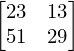

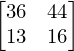

In [59]:
A = sy.Matrix([[3, 4], [7, 8]])
B = sy.Matrix([[5, 3], [2, 1]])
A*B
B*A

How do we find commutable matrices?

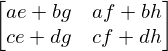

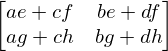

In [60]:
A = sy.Matrix([[a, b], [c, d]])
B = sy.Matrix([[e, f], [g, h]])
A*B
B*A

To make $\pmb{AB} = \pmb{BA}$, we can show $\pmb{AB} - \pmb{BA} = 0$

In [ ]:
M = A*B - B*A
M

\begin{align}
b g - c f&=0 \\
 a f - b e + b h - d f&=0\\
- a g + c e - c h + d g&=0 \\
- b g + c f&=0
\end{align}

If we treat $a, b, c, d$ as coefficients of the system, we and extract an augmented matrix

In [ ]:
A_aug = sy.Matrix([[0, -c, b, 0], [-b, a-d, 0, b], [c, 0, d -a, -c], [0, c, -b, 0]]); A_aug

Perform Gaussian-Jordon elimination till row reduced formed.

In [ ]:
A_aug.rref()

The general solution is 
\begin{align}
e - \frac{a-d}{c}g - h &=0\\
f - \frac{b}{c} & =0\\
g &= free\\
h & =free
\end{align}

if we set coefficients $a = 10, b = 12, c = 20, d = 8$, or $\pmb A = \left[\begin{matrix}10 & 12\\20 & 8\end{matrix}\right]$ then general solution becomes


\begin{align}
e - .1g - h &=0\\
f - .6 & =0\\
g &= free\\
h & =free
\end{align}
Then try a special solution when $g = h = 1$
\begin{align}
e  &=1.1\\
f & =.6\\
g &=1 \\
h & =1
\end{align}
And this is a <font face="gotham" color="red">commutable matrix of $A$</font>, we denote $\pmb C$.

In [ ]:
C = sy.Matrix([[1.1, .6], [1, 1]]);C

Now we can see that $\pmb{AB}=\pmb{BA}$.

In [ ]:
A = sy.Matrix([[10, 12], [20, 8]])
A*C
C*A

# <font face="gotham" color="purple"> Transpose of Matrices

Matrix $A_{n\times m}$ and its transpose is 


In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]]); A
A.T # transpose

In [ ]:
A = sy.Matrix([[1, 2, 3], [4, 5, 6]]); A
A.transpose()

The properties of transpose are

1. $(A^T)^T$
2. $(A+B)^T=A^T+B^T$
3. $(cA)^T=cA^T$
4. $(AB)^T=B^TA^T$

We can show why this holds with SymPy:

In [ ]:
A = sy.Matrix([[a, b], [c, d], [e, f]])
B = sy.Matrix([[g, h, i], [j, k, l]])
AB = A*B
AB_tr = AB.transpose(); AB_tr

In [ ]:
A_tr_B_tr = B.transpose()*A.transpose()
A_tr_B_tr

In [ ]:
AB_tr - A_tr_B_tr

# <font face="gotham" color="purple"> Identity and Inverse Matrices

## <font face="gotham" color="purple"> Identity Matrices

Identity matrix properties:
$$
AI=IA = A
$$

Let's generate $\pmb I$ and $\pmb A$:

In [ ]:
I = np.eye(5); I

In [ ]:
A = np.around(np.random.rand(5, 5)*100); A

In [ ]:
A@I

In [ ]:
I@A

## <font face="gotham" color="purple"> Elementary Matrix

An elementary matrix is a matrix that can be obtained from a single elementary row operation on an identity matrix. Such as:

$$
\left[\begin{matrix}1 & 0 & 0\cr 0 & 1 & 0\cr 0 & 0 & 1\end{matrix}\right]\ \matrix{R_1\leftrightarrow R_2\cr ~\cr ~}\qquad\Longrightarrow\qquad \left[\begin{matrix}0 & 1 & 0\cr 1 & 0 & 0\cr 0 & 0 & 1\end{matrix}\right]
$$

The elementary matrix above is created by switching row 1 and row 2, and we denote it as $\pmb{E}$, let's left multiply $\pmb  E$ onto a matrix $\pmb  A$. Generate $\pmb A$

In [ ]:
A = sy.randMatrix(3, percent = 80); A # generate a random matrix with 80% of entries being nonzero

In [ ]:
E = sy.Matrix([[0, 1, 0], [1, 0, 0], [0, 0, 1]]);E

It turns out that by multiplying $\pmb E$ onto $\pmb A$, $\pmb A$ also switches the row 1 and 2. 

In [ ]:
E*A

Adding a multiple of a row onto another row in the identity matrix also gives us an elementary matrix.

$$
\left[\begin{matrix}1 & 0 & 0\cr 0 & 1 & 0\cr 0 & 0 & 1\end{matrix}\right]\ \matrix{~\cr ~\cr R_3-7R_1}\qquad\longrightarrow\left[\begin{matrix}1 & 0 & 0\cr 0 & 1 & 0\cr -7 & 0 & 1\end{matrix}\right]
$$

Let's verify with SymPy.

In [ ]:
A = sy.randMatrix(3, percent = 80); A
E = sy.Matrix([[1, 0, 0], [0, 1, 0], [-7, 0, 1]]); E

In [ ]:
E*A

We can also show this by explicit row operation on $\pmb A$.

In [ ]:
EA = sy.matrices.MatrixBase.copy(A)
EA[2,:]=-7*EA[0,:]+EA[2,:]
EA

We will see an importnat conclusion of elementary matrices multiplication is that an invertible matrix is a product of a series of elementary matrices.

## <font face="gotham" color="purple"> Inverse Matrices

If $\pmb{AB}=\pmb{BA}=\mathbf{I}$, $\pmb B$ is called the inverse of matrix $\pmb  A$, denoted as $\pmb B= \pmb A^{-1}$.


NumPy has convenient function ```np.linalg.inv()``` for computing inverse matrices. Generate $\pmb A$

In [ ]:
A = np.round(10*np.random.randn(5,5)); A

In [ ]:
Ainv = np.linalg.inv(A)
Ainv
A@Ainv

The ```-0.``` means there are more digits after point, but omitted here.

### <font face="gotham" color="purple"> $[A\,|\,I]\sim [I\,|\,A^{-1}]$ Algorithm

A convenient way of calculating inverse is that we can construct an augmented matrix $[\pmb A\,|\,\mathbf{I}]$, then multiply a series of $\pmb E$'s which are elementary row operations till the augmented matrix is row reduced form, i.e. $\pmb A \rightarrow \mathbf{I}$. Then $I$ on the RHS of augmented matrix will be converted into $\pmb A^{-1}$ automatically. 

We can show with SymPy's ```.rref()``` function on the augmented matrix $[A\,|\,I]$.

In [ ]:
AI = np.hstack((A, I)) # stack the matrix A and I horizontally
AI = sy.Matrix(AI); AI

In [ ]:
AI_rref = AI.rref(); AI_rref

Extract the RHS block, this is the $A^{-1}$.

In [ ]:
Ainv = AI_rref[0][:,5:];Ainv # extract the RHS block

I wrote a function to round the float numbers to the $4$th digits, but this is not absolutely neccessary.

In [ ]:
round_expr(Ainv, 4) 

We can verify if $AA^{-1}=\mathbf{I}$

In [ ]:
A = sy.Matrix(A)
M = A*Ainv
round_expr(M, 4) 

We got $\mathbf{I}$, which means the RHS block is indeed $A^{-1}$.

### <font face="gotham" color="purple"> An Example of Existence of Inverse

Determine the values of $\lambda$ such that the matrix
$$A=\left[ \begin{matrix}3 &\lambda &1\cr 2 & -1 & 6\cr 1 & 9 & 4\end{matrix}\right]$$
is not invertible.

Still,we are using SymPy to solve the problem.

In [ ]:
lamb = sy.symbols('lamda') # SymPy will automatically render into LaTeX greek letters
A = np.array([[3, lamb, 1], [2, -1, 6], [1, 9, 4]])
I = np.eye(3)
AI = np.hstack((A, I))
AI = sy.Matrix(AI)
AI_rref = AI.rref()
AI_rref

To make the matrix $A$ invertible we notice that are one conditions to be satisfied (in every denominators):
\begin{align}
-6\lambda -465 &\neq0\\
\end{align}

Solve for $\lambda$'s.

In [ ]:
sy.solvers.solve(-6*lamb-465, lamb)

Let's test with determinant. If $|\pmb A|=0$, then the matrix is not invertible. Don't worry, we will come back to this. 

In [ ]:
A = np.array([[3, -155/2, 1], [2, -1, 6], [1, 9, 4]])
np.linalg.det(A)

The $|\pmb A|$ is practically $0$. The condition is that as long as $\lambda \neq -\frac{155}{2}$, the matrix $A$ is invertible.

### <font face="gotham" color="purple"> Properties of Inverse Matrices

1. If $A$ and $B$ are both invertible, then $(AB)^{-1}=B^{-1}A^{-1}$.
2. If $A$ is invertible, then $(A^T)^{-1}=(A^{-1})^T$.
3. If $A$ and $B$ are both invertible and symmetric such that $AB=BA$, then $A^{-1}B$ is symmetric.

The <font face="gotham" color="red"> first property</font> is straightforward
\begin{align}
ABB^{-1}A^{-1}=AIA^{-1}=I=AB(AB)^{-1}
\end{align}

The <font face="gotham" color="red"> second property</font> is to show
$$
A^T(A^{-1})^T = I
$$
We can use the property of transpose
$$
A^T(A^{-1})^T=(A^{-1}A)^T = I^T = I
$$

The <font face="gotham" color="red">third property</font> is to show
$$
A^{-1}B = (A^{-1}B)^T
$$
Again use the property of tranpose
$$
(A^{-1}B)^{T}=B^T(A^{-1})^T=B(A^T)^{-1}=BA^{-1}
$$
We use the $AB = BA$ condition to continue
\begin{align}
AB&=BA\\
A^{-1}ABA^{-1}&=A^{-1}BAA^{-1}\\
BA^{-1}&=A^{-1}B
\end{align}
The plug in the previous equation, we have
$$
(A^{-1}B)^{T}=BA^{-1}=A^{-1}B
$$